## Well plotting

Some preliminaries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import welly
welly.__version__

'0.1.0'

In [2]:
import os
env = %env

## Load a well and add deviation and a striplog

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [3]:
from welly import Well

In [4]:
w = Well.from_las('P-130_out.LAS')

In [5]:
from striplog import Legend, Striplog
legend = Legend.builtin('NSDOE')
strip = Striplog.from_image('P-130_25_2618.png', 25, 2618, legend=legend)
w.data['strip'] = strip

### Add deviation and form legend

In [6]:
dev = np.loadtxt('P-130_deviation_survey.csv', delimiter=',', skiprows=1)
w.location.add_deviation(dev[:, :3], td=2618.3)

In [7]:
curve_legend_csv = """colour,lw,xscale,curve mnemonic
#ff0000,2.0,linear,GR
#000000,2.0,log,M2R2
#00ff00,2.0,linear,DT
#ffff00,3.0,linear,DTS
"""
curve_legend = Legend.from_csv(curve_legend_csv)

In [8]:
complete_legend = legend + curve_legend

### Plot

In [ ]:
tracks = ['MD', 'strip', 'GR', 'TVD', 'M2R2', ['DT', 'DTS'], 'MD']

In [ ]:
w.plot(tracks=tracks, legend=complete_legend)

## Playing with `sharey`

Axes(0.125,0.125;0.168478x0.775)


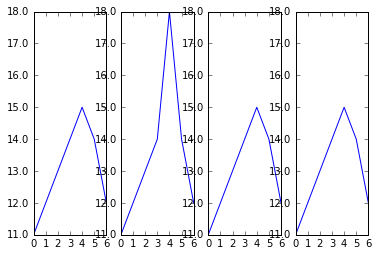

In [36]:
fig = plt.figure()

ax = fig.add_subplot(141)
ax.plot([1,2,3,4,5,4,2])

ax1 = fig.add_subplot(142, sharey=ax)
print(ax1._sharey)
ax1.plot([1,2,3,4,8,4,2])
tx = ax1.get_yticks()
ax1.set_yticklabels(tx+10)
sh = ax1._sharey
ax1._sharey = None

ax2 = fig.add_subplot(143, sharey=ax)
ax2.plot([1,2,3,4,5,4,2])
sh = ax1._sharey

ax2 = fig.add_subplot(144, sharey=ax)
ax2.plot([1,2,3,4,5,4,2])
sh = ax1._sharey

plt.show()

In [25]:
dir(ax1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_axisbg',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_cursorProps',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',
 '_

In [32]:
ax1.get_shared_y_axes()